In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import random

In [41]:
def get_reservoir_groupped(pro_path):
    '''get group dataframe for reservoir id
    '''
    sliced_reservoir_ids = {}
    pro = pd.read_excel(pro_path)
    pro_group = pro.groupby(['Reservoir ID'])
    
    for group in pro_group.groups:
        group_idx = pro_group.groups[group]
        sliced_reservoir_id = pro.iloc[group_idx]
        sliced_reservoir_ids[group] = sliced_reservoir_id
        
    return sliced_reservoir_ids
    

In [85]:
def get_field_event_json(file_path):
    '''get id_events pair,has such key-value pair for select columns
    '''
    field_event = {}
    select_cols = ['Production stage starting date (YYYY-MM)','Improved recovery methods (secondary)',\
                   'Improved recovery methods (EOR)','Improved recovery methods (other)']
    
    events = pd.read_excel(file_path)
    events['Production stage starting date (YYYY-MM)'] = events['Production stage starting date (YYYY-MM)'].astype('str')
    event_ids =list(events['Reservoir identification'].unique())
#     print(events.info())
    ## reservoir identification as the key for whole json file
    event_group = events.groupby(['Reservoir identification'])
    
    for reservoir_id in event_group.groups:
        ##get idx 
        group_idx = event_group.groups[reservoir_id]
        ##get dataframe
        sliced_events = events.iloc[group_idx]
        ##slice dataframe
        chosen_df = sliced_events[select_cols]
#         chosen_df.set_index('Production stage starting date (YYYY-MM)')
        ##save chosen_df to json file
        chosen_df_to_js = chosen_df.to_json(orient='index')
        field_event[reservoir_id] = chosen_df_to_js
    
        
    return field_event,event_ids

In [38]:
def get_id_for_json(id_number,events):
    '''get json format for id data
    '''
    return json.loads(events[id_number])

In [35]:
def get_id_event(ran_id_events):
    
    '''get time with event pair for such id event json file
    '''
    event_dict = {}
    ##iterate throught the json data
    for key in ran_id_events.keys():
        start_time_json = ran_id_events[key]
        start_time_dict = list(start_time_json.items())
        ##get key
        event_key =  start_time_dict[0][1]
        ##get value
        event_values = [start_time_dict[i][1] for i in range(len(start_time_dict)) if i>0 ]
        event_dict[event_key] = event_values
        
    return event_dict

In [222]:
def plot_pro_events(ran_id_pro,time_event_pair):
    '''plot field production plot and annoted the production period on that
    '''
    COLOR_Y ='b'
    COLOR_Y_ = 'r'
    ylabel='annual oil(mmbo)'
    xlabel='year'
    y1label = 'annual water(mmbo)'
    legend_text = ['annual oil production','annual water production']
    title = ran_id_pro['Field name'].unique()[0].title()+' (' +\
            ran_id_pro['Reservoir name'].unique()[0].title() + ') ' +\
            'Production Plot'
    ##vairables for annotation
#     xdata, ydata = time_event_pair.
    arrowprops = dict(
        arrowstyle = "->",
        connectionstyle = "angle,angleA=0,angleB=135,rad=10")
    offset = -10
    # sliced_reservoir_ids[40340502501]
    y = ran_id_pro['Annual oil (MMBO)']
    x = ran_id_pro['YEAR']
    y_ = ran_id_pro['Annual water \n(MMBW)']
    
    #plot production data
    fig,ax = plt.subplots(figsize =(12,8))
    ax.plot(x,y,"-",color=COLOR_Y_)
    ax.set(ylabel=ylabel,xlabel=xlabel)
    ax.grid()
    ax1 = ax.twinx()
    ax_re=ax1.plot(x,y_,'-',color =COLOR_Y)
    ax1.set(ylabel=y1label)
    ##ax leable and title settings
    ax1.set_title(title,fontdict={'fontsize':20, 'fontweight': 'medium'})
    fig.legend(legend_text)
    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax1.yaxis.label.set_size(20)
    ##add annotations
    for key,value in time_event_pair.items(): 
#         print(key,value)
        ##correspond to key,value,get x_annoate and y_annotate value
        x_annotate = key.split('-')
#         print(x_annotate,type(x_annotate))
#         print(ran_id_pro.info())
        y_annotate_mask = (ran_id_pro['YEAR'].astype('str').isin(x_annotate))
#         print(y_annotate_mask)
        y_annotate = ran_id_pro[y_annotate_mask]['Annual oil (MMBO)']
#         print(y_annotate)
        ax.annotate(s=[val.title() for val in value if  val is not None][0:3],
            xy=(float(x_annotate[0]), float(y_annotate)), xytext=(-2*offset, offset), textcoords='offset points',
             arrowprops=arrowprops)
    
    
    return ax




In [223]:
def main():
    '''get id related data from production df and event df
        plot those on the same plot
    '''
    pro_path = 'PRO.xlsx'
    event_path ='field_events.xlsx'
    
    id_corr_pro = get_reservoir_groupped(pro_path)
    id_corr_events,event_ids = get_field_event_json(event_path)
#     print(id_corr_events.keys())
    ##choose random id
    random_id = random.choice(event_ids)
#     print(random_id)
    ## get event dict and field pro for random id
    ran_id_events = get_id_for_json(random_id,id_corr_events)    
    time_event_pair = get_id_event(ran_id_events)
#     print(time_event_pair)
    ran_id_pro = id_corr_pro[random_id]
    ## plot the data
#     print(ran_id_pro.head())
    ax = plot_pro_events(ran_id_pro,time_event_pair)
    
    ax.figure
    

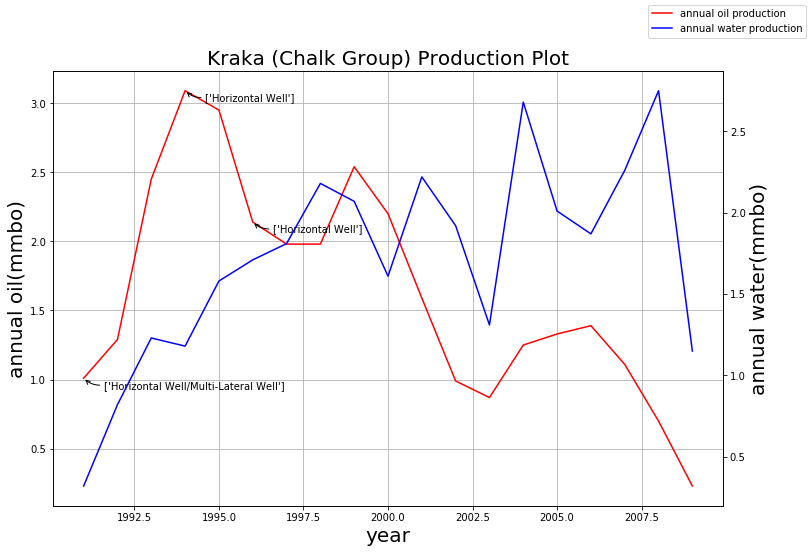

In [224]:
main()